In [26]:
# 데이터 불러오기
# 데이터를 배치 형태로 만드는 법과 데이터를 전처리하는 방법에 대해 알아보기

In [27]:
import torch
import torchvision # 이미지와 관련된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# tr.Compose 내에 원하는 전처리를 차례대로 넣어주면 된다.
transf = tr.Compose([tr.Resize(16), tr.ToTensor()]) # 예시 : 16x16 으로 이미지 크기 변환 후 텐서 타입으로 변환
# 원본 이미지의 너비, 높이가 다를 경우 각각 지정해줘야함 ; tr.Resize((16, 16))

# torchvision.datasets 에서 제공하는 CIFAR10 데이터를 불러오기 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
# root : 다운로드 받을 경로
# train = True : 학습 데이터 불러오기, False : 테스트 데이터 불러오기
# transform = transf : 미리 선언한 전처리 사용하기 

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
# 데이터셋 크기
print(trainset[0][0].size())

# 데이터셋 = 이미지와 라벨이 동시에 들어있는 튜플 형태
# trainset[0] : 학습 데이터의 첫 번째 데이터 ; 이미지 한 장과 라벨 숫자 하나가 저장되어 있음
# trainset[0][0] : 이미지 , trainset[0][1] : 라벨
# 이미지 사이즈 3 x 16 x 16 ; 3 : 채널수, 16x16 : 이미지의 너비와 높이 의미
# 컬러 사진은 RGB 이미지이므로 채널이 3개

torch.Size([3, 16, 16])


In [30]:
# DataLoader : 데이터를 미니 배치 형태로 만들어준다. 배치 데이터에 관한 배치 사이즈 및 셔플 여부 선택 가능
trainloader = DataLoader(trainset, batch_size=50, shuffle=True) 
testloader = DataLoader(testset, batch_size=50, shuffle=False)
# batch_size=50, shuffle=True : 무작위로 데이터를 섞어 한 번에 50개의 이미지를 묶은 배치로 제공

In [31]:
len(trainloader)
# CIFAR10 의 학습 이미지는 50000 장이고 배치 사이즈가 50장 -> 배치의 개수 : 1000

1000

In [32]:
# 배치 이미지 확인
images, labels = iter(trainloader).next() # iter, next 함수 이용해 trainloader 첫 번째 배치 불러오기
print(images.size()) # 배치 사이즈 ; (배치 크기) x (채널 수) x (너비) x (높이) 의미

torch.Size([50, 3, 16, 16])


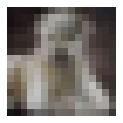

In [33]:
oneshot = images[1].permute(1, 2, 0).numpy()
# image[1] 크기 : (3, 16, 16)
# 그림을 그려주기 위해서는 채널 수가 가장 뒤로 가는 형태 (16, 16, 3) 으로 변형해야함 -> permute(1, 2, 0)
# permute(1, 2, 0) 은 기존 차원의 위치인 (0, 1, 2) 를 (1, 2, 0) 으로 바꾸는 함수
# 마지막으로 numpy() 로 넘파이 배열로 변환

plt.figure(figsize=(2, 2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

In [34]:
# 같은 클래스 별로 폴더를 정리한 경우

# 데이터가 같은 클래스 별로 미리 폴더를 정리한 경우, ImageFolder 하나로 개인 데이터 사용 가능
# 폴더 별로 자동 라벨링 -> 별도로 라벨링 할 필요 없음
# 마지막으로 ImageFolder 에 상위 폴더 ./class 를 입력하면 이미지와 라벨이 정리되어 데이터를 불러온다

In [35]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf)
trainloader = DataLoader(trainset, batch_size=1, shuffle=False)

In [36]:
# 정리되지 않은 커스텀 데이터 불러오기

# ImageFolder 를 이용하면 매우 간단하게 이미지 데이터를 사용할 수 있지만 여러 가지 이유로 사용 불가능한 경우
# 1. 라벨 별로 폴더 정리가 되어 있으면 매우 좋겠지만 그렇지 않은 경우가 많다
# 2. 정리를 하고 싶지만 다른 작업들과 공유된 데이터인 경우 폴더를 함부로 정리할 수 없다
# 3. 이미지 데이터라도 이미지가 아닌 텍스트, 리스트, 배열 등의 다른 형대로 저장되어 있는 경우도 있다

In [37]:
# 커스텀 데이터 불러오기 기본 형태

from torch.utils.data import Dataset

class classname(Dataset): # Dataset 을 상속받아 DataLoader 에서 배치 단위로 불러올 수 있게 해준다

    def __init__(self):
        pass
    def __getitem__(self, index): # DaataLoader 를 통해 샘플이 요챙되면 __getitem__ 은 인덱스에 해당하는 샘플을 찾아서 준다
        pass
    def __len__(self): # __len__ 은 크기를 반환한다
        pass

In [38]:
# 커스텀 데이터 세트 예시
# 32x32 크기인 RGB 컬러 이미지 100장과 그에 대한 라벨이 되어있고 넘파이 배열로 정리가 되어 있다고 가정

train_images = np.random.randint(256, size=(100, 32, 32, 3))/255
train_labels = np.random.randint(2, size=(100, 1))

class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data) # 데이터를 텐서로 변환
        self.x_data = self.x_data.permute(0, 3, 1, 2) # 이미지 크기 (100, 32, 32, 3) -> (100, 3, 32, 32) 로 변환
        self.y_data = torch.LongTensor(y_data) # 데이터를 텐서로 변환
        self.len = self.y_data.shape[0] # 입력 데이터의 개수에 대한 변수 self.len 생성
    
    def __getitem__(self, index): # 뽑아낼 데이터에 대해 인덱스 처리
        return self.x_data[index], self.y_data[index]

    def __len__(self): # 미리 선언한 self.len 반환
        return self.len

In [39]:
# TensorData 클래스를 train_data 로 정의하여 DataLoader 에 넣어 배치 데이터 형태로 사용 가능
train_data = TensorData(train_images, train_labels)
train_loder = DataLoader(train_data, batch_size=10, shuffle=True)

In [40]:
# 커스텀 데이터와 커스텀 전처리 사용하기

# 파이토치는 전처리 함수들을 제공하여 매우 편리하다
# 이미지의 경우 PIL-Image 타입이거나 Tensor 타입일 때만 사용 가능
# 제공하지 않는 기능에 대해 직접 구현 필요

In [41]:
# 커스텀 전처리 직접 정의 및 구현

# 텐서 변환 전처리 클래스 정의
# 전처리는 MyDataset 클래스의 sample 을 불러와 작업하므로 __call__ 이용
# ToTensor 는 입력 데이터를 텐서 데이터로 변환, 학습에 맞는 크리고 변환하는 작업 담당
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs) # 텐서 변환
        inputs = inputs.permute(2, 0, 1) # 크기 변환, __call__ 은 입력값을 하나씩 불러오므로 (0, 3, 1, 2) 가 아니다
        return inputs, torch.LongTensor(labels) # 텐서 변환

In [54]:
# 2. 선형식    # 책에는 안나옴 
class LinearTensor:
    
    def __init__(self, slope=1, bias=0):
        self.slope = slope
        self.bias = bias     
        
    def __call__(self, sample):
        inputs, labels = sample
        inputs = self.slope*inputs + self.bias # ax+b 계산하기
        return inputs, labels 

In [59]:
# 커스텀 전처리 직접 정의 및 구현

# CutOut 전처리 클래스 정의
# 이미지 내부에 무작위로 사각형 영역을 선택하여 0 으로 만드는 데이터 증식 방법

class CutOut:

    # 외부에서 CutOut 발생 비율을 받기 위해 __init__ 함수를 사용하여 ratio 를 받는다.
    # 기본 ratio = 0.5 ; 불러온 이미지에 대해 50% 확률로 CutOut 을 발현한다
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)

    # __call__ 메소드는 샘플을 받는다
    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1)) # active 는 정수를 뽑는다. 50% 일 경우 0과 1 중 하나를 뽑는다

        if active == 0: # active = 0 이면 cutout 발현, 0이 아니면 원본 내보냄
            _, w, h = inputs.size() # 이미지의 너비와 높이 받음, 채널 수는 필요없으므로 _ 로 받는다
            min_len = min(w, h) # 너비와 높이의 최소값
            box_size = int(min_len//4) # CutOut 의 크기를 길이의 최소값의 25% 로 설정
            idx = int(np.random.randint(0, min_len - box_size, 1)) # idx를 통해 CutOUt 박스의 좌측 상단 꼭지점 위치를 정한다
            inputs[ : ,idx:idx + box_size, idx : idx + box_size] = 0 # 해당 정사각형 영엵의 값을 0으로 대체

        return inputs, labels

In [60]:
# 4.3.3 의 Mydataset 에서 전처리 추가

class MyDataset(Dataset):

    def __init__(self, x_data, y_data, transform=None): # __init__ 입력값에 None 추가, transform=None 은 아무 것도 적지 않으면 전처리 사용 X
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform: # 만약 transform 이 None 이 아니라면 __getitme__ 에서 sample을 반환하기 전에 전처리를 할 수 있도록 if문 작성
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)  # transform=None 일 경우 텐서 변환을 기본적으로 하도록 구성
        
        return sample

    def __len__(self):
        return self.len

In [61]:
# 직접 만든 ToTensor()를 사용, CutOut 은 괄호() 에 아무것도 없으므로 발현 비율 기본값인 0.5로 CutOut 시행
trans = tr.Compose([ToTensor(), CutOut()])

# 정의된 전처리를 입력한 데이터 세트로 만들고 DataLoader 사용
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

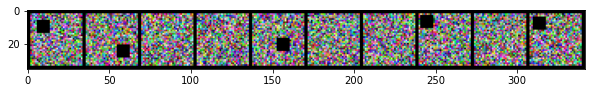

In [62]:
import torchvision # 그리드를 만들어주는 torchvision.utils.make_grid를 사용하기 위해 torchvision 불러온다
images1, labels1 = iter(train_loader1).next() # iter, next로 첫 번째 배치를 불러와 결과 확인

def imshow(img):
    plt.figure(figsize=(10, 100))
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))